# Quadrature



## Trapazoid integration

* $N_{trap}$ is the number of trapazoids ($N_{trap}=5$).
* We have $N_{trap}+1$ points (6 points).

<img src=http://ignite.byu.edu/che263/lectures/L18_f02.svg width=500>
 

\begin{align}
I_0 &= \frac{\Delta x}{2}(f_0+f_1), \\
I_1 &= \frac{\Delta x}{2}(\phantom{f_0+}f_1+f_2), \\
I_2 &= \frac{\Delta x}{2}(\phantom{f_0+f_1+}f_2+f_3), \\
I_3 &= \frac{\Delta x}{2}(\phantom{f_0+f_1+f_2+}f_3+f_4), \\
I_4 &= \frac{\Delta x}{2}(\phantom{f_0+f_1+f_2+f_3+}f_4+f_5). \\
\end{align}

$$I =  \left(\Delta x\sum_{i=0}^{5}f_i\right) -\frac{\Delta x}{2}(f_0+f_{5}).$$

<font color='blue'>
$$I = \left(\Delta x\sum_{i=0}^{N_{trap}}f_i\right) -\frac{\Delta x}{2}(f_0+f_{N_{trap}}).$$
</font>

* Note the overlap of the terms: two of every $f$ value except first and last.
    * So, we double all of them and then subtract the first and last.


This has the following generic form, which is common to other numerical integration (quadrature) methods:

$$I = \int_a^bf(x)dx \approx \sum_{i=0}^{n-1}w_if(x_i).$$

That is, the integral is approximated as some sum over the function at points $x_i$, multiplied by some coefficients $w_i$. For the Trapazoid rule, $w_i=\Delta x$ for the interior points and and $w=\Delta x/2$ for  the edge points.

* Usually the points $x_i$ are fixed, and a uniform spacing is common. 
    * Call these $x_i$ points the *abscissas* 
* Here, we **allow both specification of the weights $w_i$ and the abscissas $x_i$**.
* This will allow much better accuracy for a given computational cost.

Gauss Quadrature selects the $x_i$ and the $w_i$ so that the integrals of polynomials up to degree $2n-1$ is exact.
* This is done on the domain $[-1,\,1]$ instead of $[a,\,b]$ for generality and convenience. 
* We will write $z$ as our integration variable instead of $x$ since the quadrature is written on the domain $[-1,\,1]$. We will then transform back to $[a,\,b]$ and use the more common symbol $x$.


### Two point quadrature: $n=2$

* Integrate polynomials to degree $2n-1=3$
* Polynomials: $1$, $z$, $z^2$, $z^3$:

\begin{align}
1:&\phantom{xxxxx}I_1 = \int_{-1}^11dz = \left.z\right|_{-1}^1 &= 2 &\Leftrightarrow \sum_{i=0}^1w_iz_i^0 = w_0z_0^0 + w_1z_1^0, \\
z:&\phantom{xxxxx}I_z = \int_{-1}^1zdz = \left.\frac{1}{2}z^2\right|_{-1}^1 &= 0 &\Leftrightarrow \sum_{i=0}^1w_iz_i^1 =w_0z_0 + w_1z_1, \\
z^2:&\phantom{xxxxx}I_{z^2} = \int_{-1}^1z^2dz = \left.\frac{1}{3}z^3\right|_{-1}^1 &= \frac{2}{3} &\Leftrightarrow \sum_{i=0}^1w_iz_i^2 =w_0z_0^2 + w_1z_1^2, \\
z^3:&\phantom{xxxxx}I_{z^3} = \int_{-1}^1z^3dz = \left.\frac{1}{4}z^4\right|_{-1}^1 &= 0 &\Leftrightarrow \sum_{i=0}^1w_iz_i^3 =w_0z_0^3 + w_1z_1^3. \\
\end{align}



* This gives four equations in four unknowns: $z_0$, $z_1$, $w_0$, $w_1$:
\begin{align}
2 &= w_0 + w_1 \\
0 &= w_0z_0 + w_1z_1 \\
\frac{2}{3} &= w_0z_0^2 + w_1z_1^2 \\
0 &= w_0z_0^3 + w_1z_1^3
\end{align}


* Solving these gives:

\begin{align}
w_0 &= 1, \\
w_1 &= 1, \\
z_0 &= -\frac{1}{\sqrt{3}}, \\
z_1 &= \frac{1}{\sqrt{3}}.
\end{align}



* Hence, for some $p(z) = a_3z^3 + a_2z^2 + a_1z + a_0 dz$, for some $a$'s, we have

$$\int_{-1}^1 p(z)dz = 1\cdot p(-1/\sqrt{3}) + 1\cdot p(1/\sqrt{3}).$$

* This can be extended to higher degree using higher $n$.

* To the extent that our function is well represented by a degree $2n-1$ polynomial, the following approximation is accurate:

<font color="blue">
$$\int_{-1}^1 F(z) dz \approx \sum_0^{n-1} w_iF(z_i).$$
</font>

* (Recall, a Taylor Series approximation of a function is a polynomial representation of the function.)


#### Example: demonstrate the quadrature using a 4th order polynomial with random coefficients. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

In [3]:
a = np.random.rand(4)

Igq = np.polyval(a, -1.0/np.sqrt(3)) + np.polyval(a, 1.0/np.sqrt(3))
Ipy = quad(lambda z: np.polyval(a, z), -1, 1)[0]

print('I Gauss Quadrature: ', Igq)
print('I Python quad func: ', Igq)

I Gauss Quadrature:  0.824105214942345
I Python quad func:  0.824105214942345


#### Numpy has a function that gives the weights and abscissas.

In [7]:
from numpy.polynomial.legendre import leggauss

n    = 2
z, w = leggauss(n)

print('abscissas: z_i', z)
print('weights  : w_i', w)

abscissas: z_i [-0.57735027  0.57735027]
weights  : w_i [1. 1.]


### Scale the domain

* We often want to solve on some domain $[a,\,b]$ instead of $[-1,\,1]$.
* That is, suppose we have a function $f(x)$ we want to integrate:

$$I = \int_a^bf(x)dx.$$



* We transform $x$ to $z$ using:

$$x = mz+c.$$

* At $x=a$, $z=-1$, and at $x=b$, $z=1$. 
* This gives 

<font color='blue'>
$$m=\frac{b-a}{2},$$
</font>

<font color='blue'>
$$c = \frac{b+a}{2}.$$
</font>

* Hence, 

$$ x = \left(\frac{b-a}{2}\right)z + \frac{b+a}{2}.$$



* Now change the integration variable from $x$ to $z$:

$$ I = \int_a^bf(x)dx = \int_{-1}^1f(mz+c)mdz = m\int_{-1}^1f(mx+c)dz.$$ 

<font color="blue">
$$I = \int_a^bf(x)dx = m\int_{-1}^1f(mz+c)dz,$$
</font>




### Example: 

$$I = \int_a^b f(x)dx = \int_3^7 4+[x-5]^3dx,\,\text{or,}$$
$$a = 3,\,\,\,b = 7,$$
$$x = mz+c,$$
$$m = \frac{b-a}{2} = \frac{7-3}{2} = 2,$$
$$c = \frac{b+a}{2} = \frac{7+3}{2} = 5,$$
$$I = m\int_{-1}^1 f(mz+c)dz = m\int_{-1}^1 4+[(mz+c)-5]^3dz.$$

In [5]:
def f(x):
    return 4+(x-5)**3

a = 3
b = 7
m = (b-a)/2
c = (b+a)/2


I_fxab =   quad(f,                   a, b)[0]
I_fz11 = m*quad(lambda z: f(m*z+c), -1, 1)[0]

print(f"Compare integral over a<x<b to integral over -1<z<1 using quad function: {I_fxab}, {I_fz11}")

#--------------

n = 2
z, w = leggauss(n)
I_GQ = m*np.sum(w*f(m*z+c))

print("Compare to Gauss Quadrature: ", I_GQ)

Compare integral over a<x<b to integral over -1<z<1 using quad function: 16.0, 16.0
Compare to Gauss Quadrature:  16.0


### Example

* Compare the error of integration for Gauss Quadrature and Trapazoid methods for varying number of quadrature points. 

In [6]:
def f(x):                   # define the function
    #return np.exp(x)
    return np.sin(x)
    #return x**8
    #return x**(5/3)
    #return np.sqrt(x)
    #return x**(-1/3)

a = 3
b = 7
m = (b-a)/2
c = (b+a)/2
#Iexact = np.exp(b)   - np.exp(a)                # exact integral
Iexact = -np.cos(b)  + np.cos(a)                # exact integral
#Iexact = 1/9*b**9    - 1/9*a**9                   # exact integral
#Iexact = 3/8*b**(8/3)- 3/8*a**(8/3)        # exact integral
#Iexact = 2/3*b**(3/2)- 2/3*a**(3/2)        # exact integral
#Iexact = 3/2*b**(2/3) - 3/2*a**(2/3)       # exact integral
#Iexact = quad(f,a,b)[0]                       # "exact" integral: quad function

n = np.arange(2,18)             # list of number of quadrature points to try
ncases = len(n)                 # number of cases
Ierr = np.empty(ncases)         # array of relative errors

for i,ni in enumerate(n):
    z, w = leggauss(ni)     
    Ierr[i] = np.abs((m*np.sum(f(m*z+c)*w) - Iexact)/Iexact)
    
#-------------- Compare to trapazoid method with the same number of points:

def Itrap(f, a,b,n):
    x = np.linspace(a,b,n)
    dx = x[1] - x[0]
    return dx*np.sum(f(x)) - dx/2*(f(x[0])+f(x[-1]))

Ierr_trap = np.empty(ncases)
for i, ni in enumerate(n):
    Ierr_trap[i] = Itrap(f, a, b, ni)

Ierr_trap = np.abs( (Ierr_trap - Iexact)/Iexact )



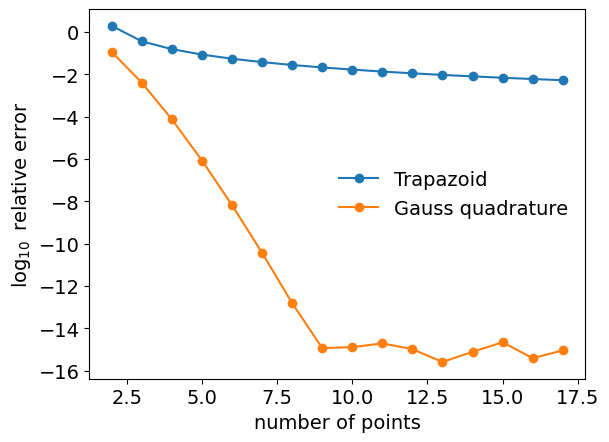

In [7]:
#------------- plot
    
plt.rc('font', size=14)
plt.plot(n, np.log10(Ierr_trap), 'o-');
plt.plot(n, np.log10(Ierr), 'o-');
plt.xlabel("number of points");
plt.ylabel(r'$\log_{10}$ relative error');
plt.legend(['Trapazoid', 'Gauss quadrature'], frameon=False);

* **The linear convergence of Gauss Quadrature, when plotted on $\log(\epsilon_r)$ versus $n$ axes implies exponential convergence rate of Gauss Quadrature. Trapazoid is only a power law.** 

## Generalized quadratures

* Often, quadratures are written more generally as

$$\int_{-1}^1W(z)F(z)dz \approx\sum_{i=0}^{n-1}w_if(z_i).$$

* Here, $W(z)$ is a weight function. 
* Above, we used $W(z)=1$. This is called a Gauss-Legendre Quadrature. 
* Guass-Legendre Quadrature is only accurate to the extent that the function can be well represented by a polynomial over the integration domain. 
* However, it may happen that our function can be **split** into a weight function multiplied by a polynomial-like part:
$$F(z) \rightarrow W(z)\hat{F}(z).$$
* As Numerical Recipes states: "We can arrange the choice of weights and abscissas to make the integral exact for a class of integrands *polynomials times some known function $W(z)$* rather than for the usual class of integrands *polynomials.*"
* When solving for the weights $w_i$ and abscissas $z_i$, rather than integrating the polynomials $1$, $z$, $z^2$, etc., as above, we integrate $W(z)1$, $W(z)z$, $W(z)z^2$, etc. 
    * This assumes we can do these integrations.
    


### Quadrature types

* Guass-Legendre: 
$$W(z)=1,$$
$$-1<x<1$$
* Gauss-Chebyshev: 
$$W(z)=(1-z^2)^{-1/2},$$
$$-1<x<1$$
* Gauss-Laguerre: 
$$W(z) = z^{\alpha}e^{-z},$$
$$-\infty<x<\infty$$
* Gauss-Hermite: 
$$W(z)=e^{-z^2},$$ 
$$-\infty<x<\infty$$
* Gauss-Jacobi: 
$$W(z) = (1-z)^{\alpha}(1+z)^{\beta},$$
$$-1<x<1$$

## Example: soot formation

* Soot is a carbonaceous particulate formed on the fuel-rich side of nonpremixed flames. 
* Soot is responsible for a flame's yellow color. The soot incandesces in the hot flame zone, giving off a warm yellow glow.
* Soot is represented by a particle size distribution: $n(m)$ where $m$ is the soot particle mass, and $n$ is the number of particles of the given mass per unit volume and per unit mass. 
    * $n\, (=)\, \#/m^3kg$.

$$\frac{\partial n}{\partial t} + \nabla\cdot(\vec{v}_sn) = S(n).$$

* Here, $\vec{v}_s$ is the soot velocity, and $S(n)$ is a source term that accounts for nucleation, growth, coagulation, and oxidation.



#### Problem
* The problem is that we would need one of these transport equations for every possible particle size (millions).
* If we knew $n$ everywhere, then we would know the full particle size distribution everywhere.
* Normally, however, all we really care about is the total soot mass, and the total number of particles:
    * $\rho Y_s\, (=)\, kg/m^3$.
    * $N\,(=)\,\#/m^3$.
    * These are sufficient to define a mean particle size as well.
    * To get these accurately, however, requires considering (somehow) the full size distribution.



#### Solution
* Rather than transport every possible size, we transport **moments** of the size distribution.
* The moments are defined as follows, where $M_k$ is moment $k$:

<font color='green'>
$$M_k = \int_0^{\infty}m^kn(m)dm.$$
</font>

* $M_0$ is just $N$.
* $M_1$ is just $\rho Y_s$.



* To get a transport equation for the moments, we multiply the transport equation for $n$ by $m^k$, and then integrate over all $m$:

$$\int m^k\frac{\partial n}{\partial t}dm  + \int m^k\nabla\cdot(\vec{v}_sn)dm = \int m^kS(n)dm.$$

* Now, $m^k$ is an independent variable, and we can move it inside derivatives. Also, derivatives commute with integrals. The first term becomes:

$$\int m^k\frac{\partial n}{\partial t}dm \rightarrow \int\frac{\partial m^kn}{\partial t}dm \rightarrow 
\frac{\partial}{\partial t}\int m^kndm \rightarrow \frac{\partial M_k}{\partial t}.$$



* The second term is done similiarly, giving:

<font color="blue">
$$\frac{\partial M_k}{\partial t} + \nabla\cdot(\vec{v}_sM_k) = \int m^kS(n(m))dm.$$
</font>

* Hence, we can transport as many moments as we like, especially $M_0=N$ and $M_1=\rho Y_s$. 
* **The only problem is that we still have to figure out how to integrate the last term, and we don't know $n(m)$.**



#### Consider the growth source term

This is given by 

$$S(n) = n(m)K_gm^{-2/3}.$$

Here, $K_g$ is a constant. the source term for $M_1=\rho Y_s$ will have units of $kg/m^3s$.
(The power here is really -1/3, but we'll use -2/3 for illustration)
The source term becomes

$$\int m^kS(n)dm \rightarrow \int n(m)m^kK_gm^{-2/3}dm $$

<font color="blue">
$$\rightarrow \int n(m)K_gm^{k-2/3}dm.$$
</font>



#### We evaluate this with Guassian Quadrature

* We let $n(m)$ be our weight function $W(m)$. 
* We know a certain number of moments $M_k$.
* To do the integration, all we need are the weights $w_i$ and abscissa's $m_i$.
* **Recall**, to get the weights and abscissas, we integrate $W(m)1$, $W(m)m$, $W(m)m^2$, $W(m)m^3$, etc.
* **But those integral equations are just the moment definition equation given above, with $W(m)\equiv n(m)$:**

<font color='green'>
$$M_k = \int_0^{\infty}n(m)m^kdm.$$
</font>


* The $w_i$ and $m_i$ are computed (conceptually) as for the Gauss Quadrature above. For 4 moments we have:

\begin{align}
M_0 &= \int m^0n(m)dm = m_0^0w_0 + m_1^0w_1, \\
M_1 &= \int m^1n(m)dm = m_0^1w_0 + m_1^1w_1, \\
M_2 &= \int m^2n(m)dm = m_0^2w_0 + m_1^2w_1, \\
M_3 &= \int m^3n(m)dm = m_0^3w_0 + m_1^3w_1.
\end{align}

* This gives us four equations in four unknowns. (Again, the $M_k$ are known.)

* If we have four moments $M_0$, $M_1$, $M_2$, $M_3$, then we can define a two point quadrature, with $m_0$, $m_1$, and $w_0$, $w_1$. 
    * (Or six moments give a three point quadrature, etc.)
* We solve for the weights and abscissas, and then get

<font color='blue'>
$$\int n(m)K_gm^{k-2/3}dm \approx \sum_{i=0}^{N_{pts}}w_iK_gm_i^{k-1/3}.$$
</font>

* Hence, we have accurately integrated the source term, without needing to explicitly know $n(m)$. All we need are the moments $M_k$, which we know since they are the variables we are transporting.
